# ベイズ線形回帰 (Bayesian linear regression)

In [1]:
using PyPlot, LinearAlgebra, Random

In [2]:
σy = 0.3

0.3

In [3]:
# Generate Toy datas
num_train, num_test = 100, 500 # sample size
dims = 4 # dimensions
Random.seed!(0);

x = rand(num_train) #range(0.1, 0.9, length=num_train)
y =  sin.(2π*x) + σy * randn(num_train);
X = hcat([x .^ p for p in 0:dims-1]...); # design matrix

xtest = range(0, 1, length=num_test)
Xtest =hcat([xtest .^ p for p in 0:dims-1]...);

In [4]:
W = randn(5, dims);

In [5]:
ys = W * Xtest';

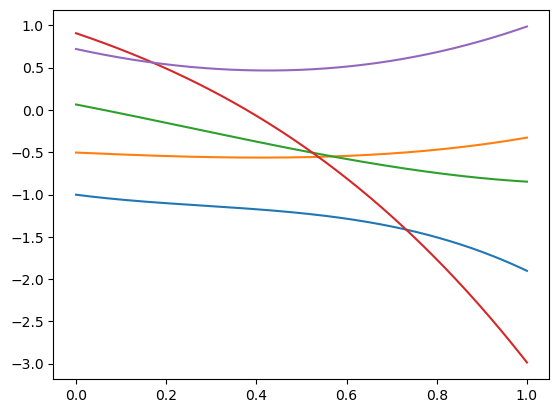

In [6]:
for i in 1:5
    plot(xtest, ys[i, :])
end

PRMLより．

パラメータ分布

$$
p(w)=\mathcal{N}(w|m_0, S_0)
$$

posterior

$$
p(w|t)=\mathcal{N}(w|m_N, S_N)
$$

ただし，

$$
\begin{align}
m_N &= \beta S_N \Phi^\top t\\
S_N^{-1}&=\alpha
\end{align}
$$

In [7]:
σw = 1

1

In [47]:
β = 0.1
α = 2.0

2.0

In [48]:
Σ̂ = (α * I + β * X' * X)^-1
μ̂ = β * Σ̂  * X' * y;

In [49]:
μtest = Xtest * μ̂
σtest = 1/β .+ diag(Xtest * Σ̂ * Xtest');

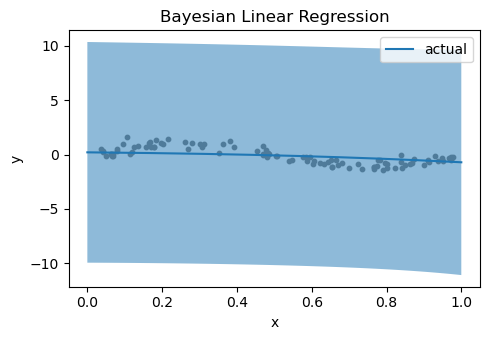

In [50]:
figure(figsize=(5,3.5))
title("Bayesian Linear Regression")
scatter(x, y, color="gray", s=10) # samples
plot(xtest, μtest, label="actual")  # regression line
fill_between(xtest, μtest-σtest, μtest+σtest, alpha=0.5)
xlabel("x"); ylabel("y"); legend()
tight_layout()